In [5]:
import numpy as np
import matplotlib.pyplot as plt

### First order differential equation

$$
\frac{dy}{dt} = f(t, y)
$$

with initial value

$$
y(t_0) = y_0
$$

### Euler Method

$$
h = t_{n+1} - t_{n}
$$

**Step size: do not need to be uniform!**

$$
f_n = f(t_n, y_n)
$$

**Approximation of the slope**

$$
y_{n+1} = y_n + f_n\cdot h
$$

In [39]:
def Euler(f, init, T, dt):
    t = np.arange(1, T+dt, dt)
    nt = t.shape[0]
    y = np.zeros(nt)
    
    y[0] = init

    for n in range(nt-1):
        y[n+1] = y[n] + f(t[n], y[n])*dt
        
    return t, y

In [40]:
def RK3(f, init, T, dt):
    t = np.arange(1, T+dt, dt)
    nt = t.shape[0]
    y = np.zeros(nt)
    
    y[0] = init

    for n in range(nt-1):
        k1 = f(t[n], y[n])
        k2 = f(t[n] + 0.5 * dt, y[n] + 0.5 * dt * k1)
        k3 = f(t[n+1], y[n] - dt * k1 + 2 * dt * k2)
        y[n+1] = y[n] + (k1 + 4 * k2 + k3) * dt / 6
        
    return t, y

## Example 1

Consider the problem

$$
\frac{dy}{dt} = 3 - 2t - 0.5y
$$

with

$$
y(0) = 1
$$

Use **Euler method** with step size $h=0.2$ to find solution at $t=0.2, 0.4, 0.6, 0.8$

Exact solution:

$$
y = 14 - 4t - 13e^{-t/2}
$$

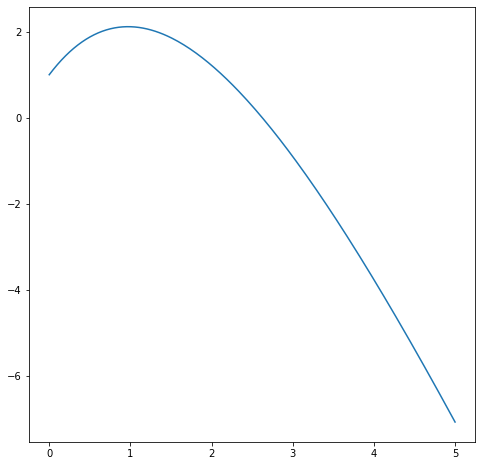

In [15]:
t = np.linspace(0, 5.0, 200)

plt.figure(figsize=(8,8))
plt.plot(t, 14-4*t-13*np.exp(-t/2))

**Euler method**:

$$
y_0 = 1
$$

and

$$
y_{n+1} = y_n + (3 - 2t_n - 0.5y_n)h
$$

In [19]:
def f1(t, y):
    return 3 - 2*t - 0.5*y
    
h = 0.2

In [22]:
%time t_num, y_num = Euler(f1, 1.0, 5.0, h)
%time t_rk, y_rk = RK3(f1, 1.0, 5.0, 0.5)

CPU times: user 268 µs, sys: 0 ns, total: 268 µs
Wall time: 250 µs
CPU times: user 294 µs, sys: 0 ns, total: 294 µs
Wall time: 278 µs


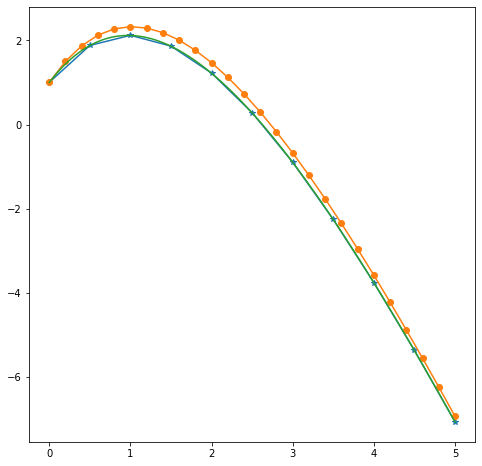

In [23]:
plt.figure(figsize=(8,8))
plt.plot(t_rk, y_rk, '-*', t_num, y_num, '-o',t, 14-4*t-13*np.exp(-t/2))

## Example 2

Consider the problem

$$
\frac{dy}{dt} = 4 - t + 2y
$$

with

$$
y(0) = 1
$$

Use **Euler method** to solve it.

Exact solution:

$$
y = -\frac{7}{4} + \frac{1}{2}t + \frac{11}{4}e^{2t}
$$

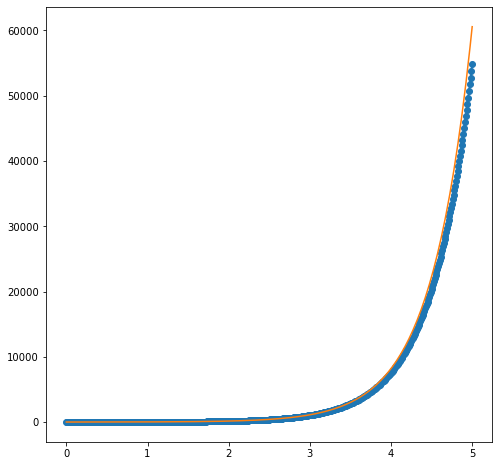

In [13]:
def f2(t, y):
    return 4 - t + 2*y
    
h = 0.01

t_num, y_num = Euler(f2, 1.0, 5.0, h)

t = np.linspace(0, 5.0, 200)

plt.figure(figsize=(8,8))
plt.plot(t_num, y_num, '-o',t, -7/4+0.5*t+11/4*np.exp(2*t))

# Example 3

$$
\frac{dy}{dx} = x^3 - \frac{y}{x}
$$

Exact solution

$$
y = \frac{1}{5} x^4 + \frac{1}{5x}
$$

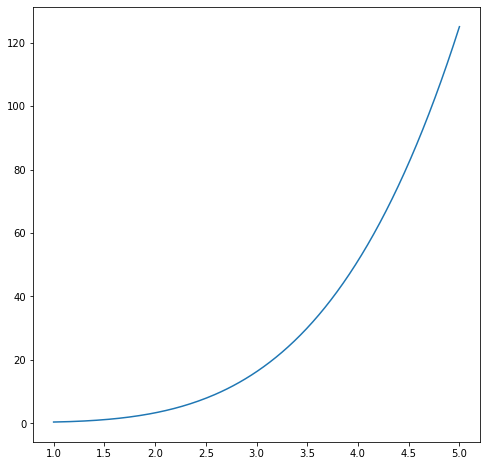

In [45]:
t = np.linspace(1.0, 5.0, 200)

plt.figure(figsize=(8,8))
plt.plot(t, 1/5 * t ** 4 + 1 / (5 * t))

In [42]:
def f3(t, y):
    return t ** 3 - y / t
    
h = 0.2

In [48]:
%time t_num, y_num = Euler(f3, 0.4, 5.0, h)
%time t_rk, y_rk = RK3(f3, 0.4, 5.0, h)

CPU times: user 194 µs, sys: 0 ns, total: 194 µs
Wall time: 194 µs
CPU times: user 474 µs, sys: 0 ns, total: 474 µs
Wall time: 459 µs


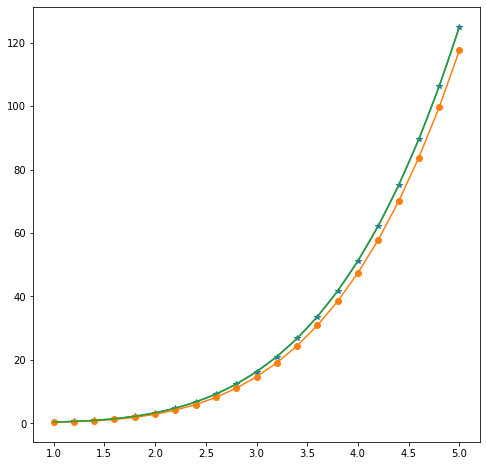

In [49]:
plt.figure(figsize=(8,8))
plt.plot(t_rk, y_rk, '-*', t_num, y_num, '-o',t, 1/5 * t ** 4 + 1 / (5 * t))